In [2]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os


In [3]:
def load_all_benchmarks(directories):
    benchmarks = {directory: [] for directory in directories}
    for directory in directories:
        for file in os.listdir(directory):
            if file.endswith(".pickle"):
                benchmarks[directory].append(file)
    return benchmarks

def return_times(filename, typename, guest_type, edge_density):
    with open(filename, 'rb') as file:
        result = pickle.load(file)
    times = []
    for n, dict in result[guest_type][edge_density].items():
        if 'walltime' in dict:
            times.append([int(n), dict['walltime']])

    if times:
        df = pd.DataFrame(np.array(times), columns=['n', 'times'])
        df['type'] = typename
        return df
    else:
        return pd.DataFrame()

def return_time_performance(guest_type, edge_density, fault_condition, algorithms, benchmark_results):

    times = []
    for alg in algorithms:
        for path in benchmark_directories:
            for file in benchmark_results[path]:
                    if alg in file and fault_condition in file:
                        time = return_times(os.path.join(path, file), alg, guest_type, edge_density)
                        times.append(time)
    df = pd.concat(times)
    df = df.rename(columns={"n": "number of guest graph nodes", "times": "time to embed"})
    return df

def plot_performance(df, title):
    sns.set_style("darkgrid")
    plt.title(title)
    sns.lineplot(data=df, x="number of guest graph nodes", y="time to embed", hue='type')
    plt.savefig("plots/" + title + ".png", dpi=300)
    plt.show()

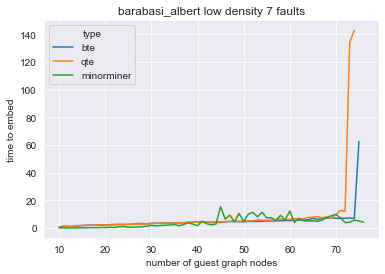

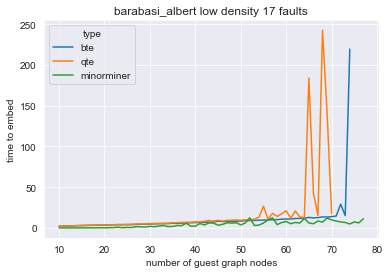

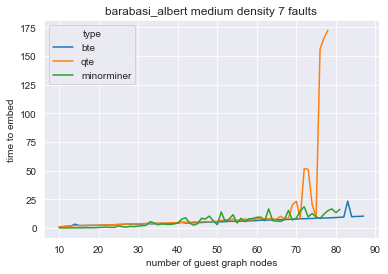

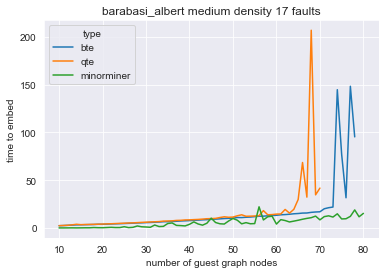

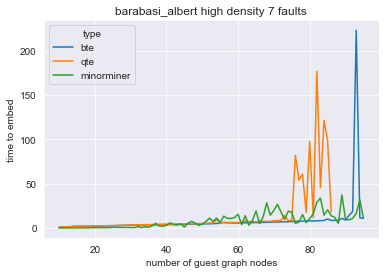

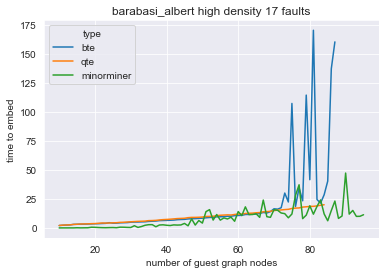

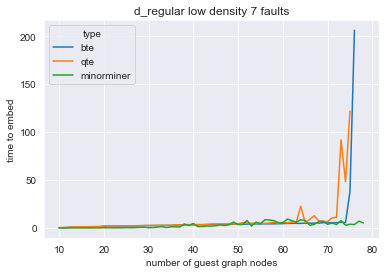

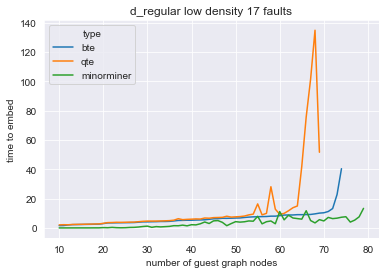

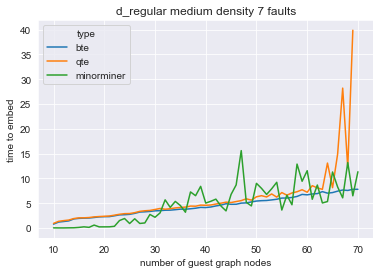

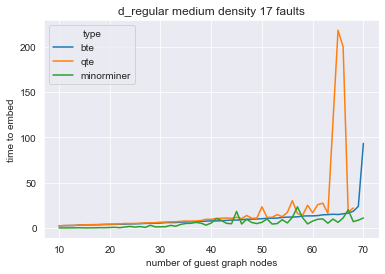

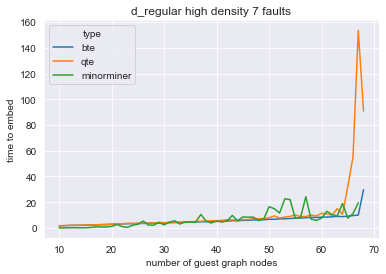

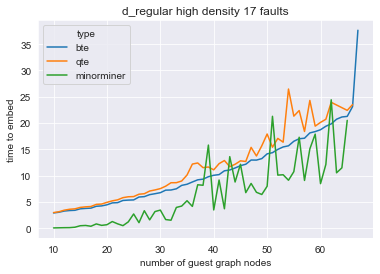

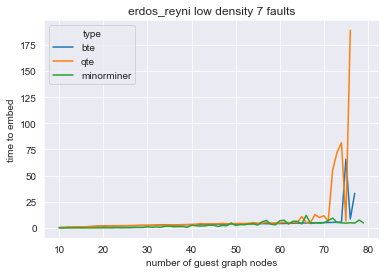

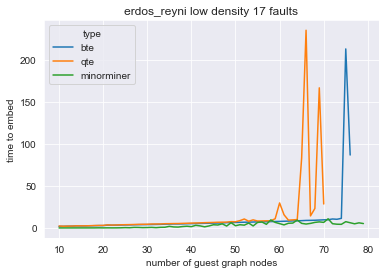

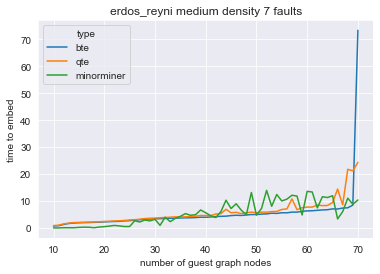

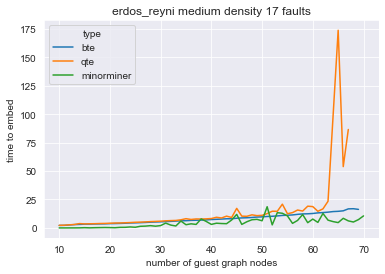

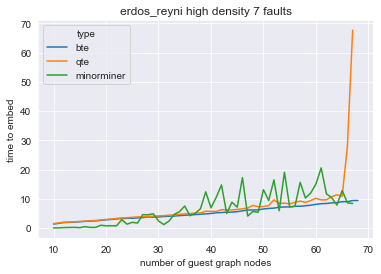

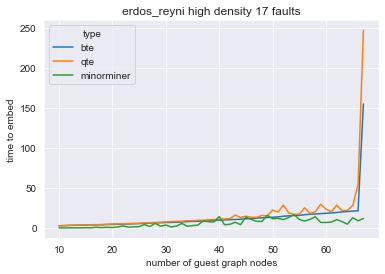

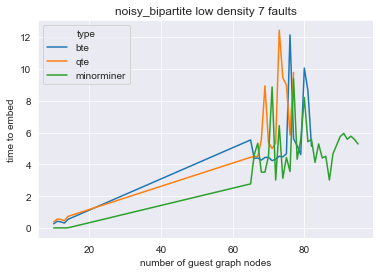

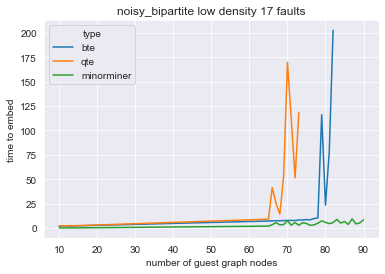

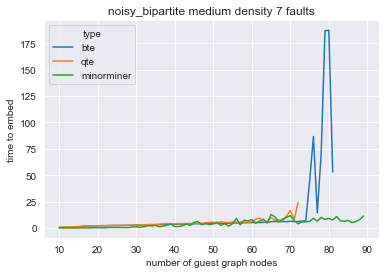

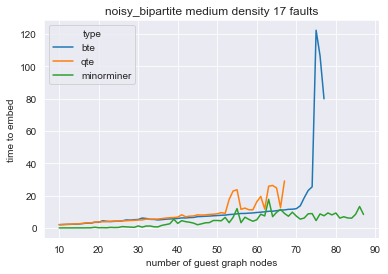

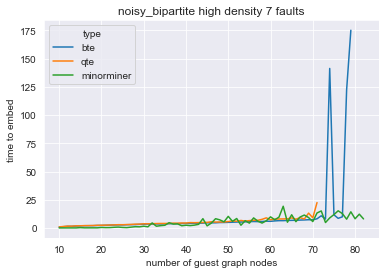

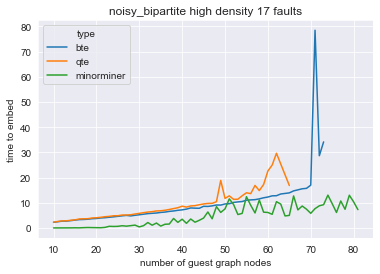

In [6]:
fault_conditions = ['faulty1', 'faulty2']
benchmark_directories = ['../benchmark/results', '../benchmark/results/small']
guest_types = ["barabasi_albert", "d_regular", "erdos_reyni", "noisy_bipartite"]
edge_densities = ["low", "medium", "high"]
algorithms = ['bte', 'qte', 'minorminer']

benchmark_results = load_all_benchmarks(benchmark_directories)

dfs = []

for guest in guest_types:
    for density in edge_densities:
        for fault in fault_conditions:
            title = guest + ' ' + density + ' density '
            if fault == "faulty1":
                title += "7 faults"
            elif fault == "faulty2":
                title += "17 faults"
            else:
                raise RuntimeError()
            dfs.append((title , return_time_performance(guest, density, fault, algorithms,
                                                   benchmark_results)))

for df in dfs:
    plot_performance(df[1], df[0])


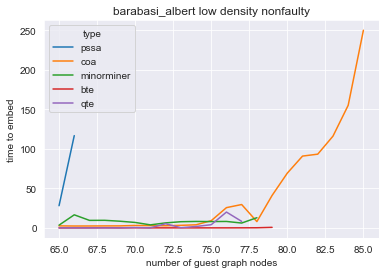

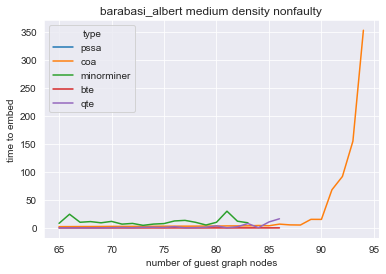

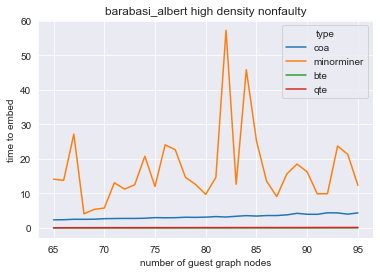

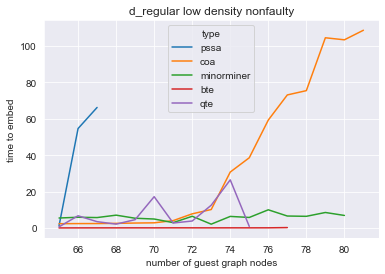

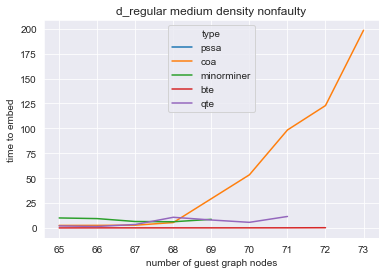

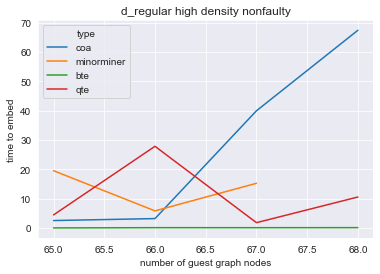

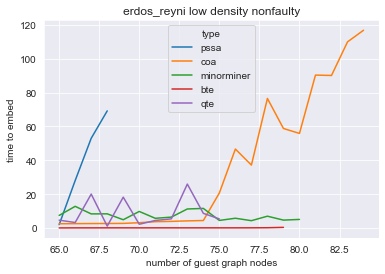

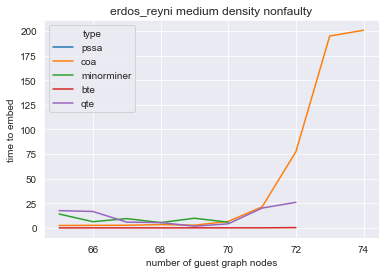

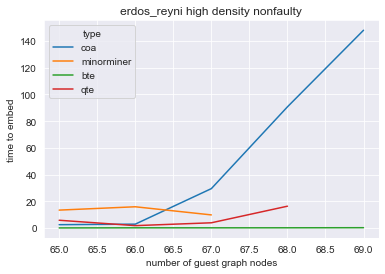

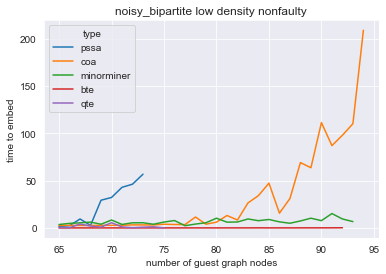

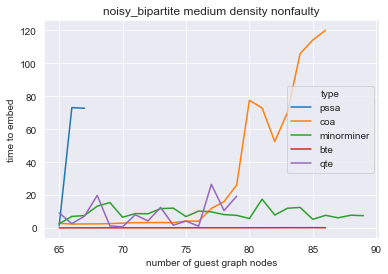

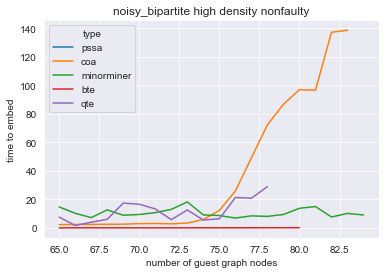

In [7]:
fault_conditions = ['nonfaulty']

benchmark_directories = ['../benchmark/results', '../benchmark/results/small']
guest_types = ["barabasi_albert", "d_regular", "erdos_reyni", "noisy_bipartite"]
edge_densities = ["low", "medium", "high"]
algorithms = ['pssa', 'coa', 'minorminer', "bte", "qte"]

benchmark_results = load_all_benchmarks(benchmark_directories)

dfs = []

for guest in guest_types:
    for density in edge_densities:
        for fault in fault_conditions:
            df = return_time_performance(guest, density, fault, algorithms, benchmark_results)
            if not df.empty:
                dfs.append((guest + ' ' + density + ' density '+ fault, df))

for df in dfs:
    plot_performance(df[1], df[0])